# Questions

## Fuzzy sets

1. What is the difference between a characteristic function and a membership function?

A characteristic function is associated with classical set theory, which determines in a binary way wether or not an element belongs to a set. The membership function is a concept in fuzzy logic which dictates the degree of membership of said element in a fuzzy set. While the characteristic function has values of 0 or 1, the membership function can take any value between 0 and 1. The higher the value, the higher is the degree of membership to the fuzzy set. This allows fuzzy logic to model uncertainty, unlike classical set theory.

Consider the two fuzzy sets in the Universe of Discourse X ={−8, −6, −4, −2, 0, 2, 4, 6, 8}:


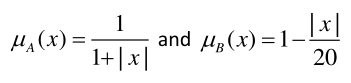

In [7]:
from IPython.display import Image

# Provide the file path or URL of the image
image_path = 'C:/Users/AndreLopes/Desktop/git/Intelligent_Systems/img.png'

# Display the image
Image(filename=image_path)


a) Are the membership functions valid in the given Universe?

Yes, because the membership values from either function has values between 0 and 1 regardless of the element considered from the universe of discourse X.

b) Compute the α-cuts of A and B for α = 0.3

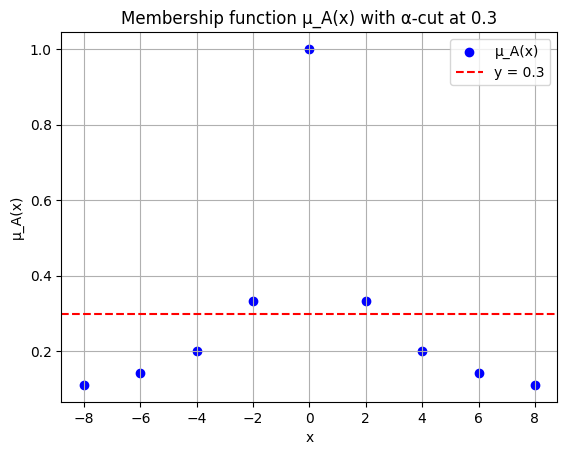

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x_values = np.array([-8, -6, -4, -2, 0, 2, 4, 6, 8])

# Calculate the corresponding y values using the function
y_values = 1 / (1 + np.abs(x_values))

# Create the plot with scatter points
plt.scatter(x_values, y_values, color='blue', marker='o', label='μ_A(x)') 

# Add a horizontal line at y=0.3
plt.axhline(y=0.3, color='red', linestyle='--', label='y = 0.3')

# Add labels and title
plt.xlabel('x')
plt.ylabel('μ_A(x)')
plt.title('Membership function μ_A(x) with α-cut at 0.3')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


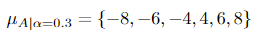

In [11]:
from IPython.display import Image

# Provide the file path or URL of the image
image_path = 'C:/Users/AndreLopes/Desktop/git/Intelligent_Systems/1ba.png'

# Display the image
Image(filename=image_path)

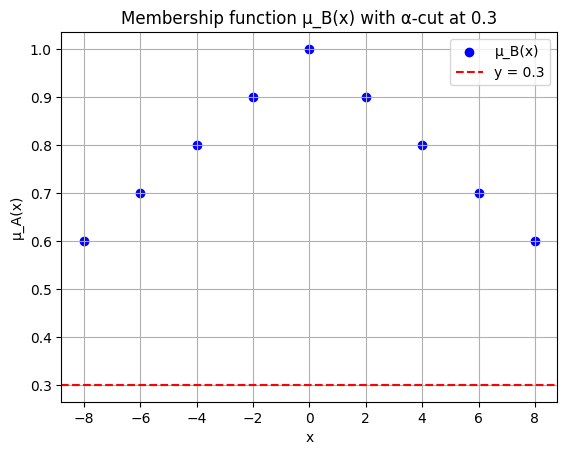

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x_values = np.array([-8, -6, -4, -2, 0, 2, 4, 6, 8])

# Calculate the corresponding y values using the function
y_values = 1 - np.abs(x_values) / 20

# Create the plot
plt.scatter(x_values, y_values, color='blue', marker='o', label='μ_B(x)') 
# Add a horizontal line at y=0.3
plt.axhline(y=0.3, color='red', linestyle='--', label='y = 0.3')

# Add labels and title
plt.xlabel('x')
plt.ylabel('μ_A(x)')
plt.title('Membership function μ_B(x) with α-cut at 0.3')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

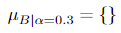

In [12]:
from IPython.display import Image

# Provide the file path or URL of the image
image_path = 'C:/Users/AndreLopes/Desktop/git/Intelligent_Systems/1bb.png'

# Display the image
Image(filename=image_path)

1. Develop a type zero or type one Takagi-Sugeno fuzzy model to classify the data. It is up
to you to select the relevant quantities for various model parameters. However, you are
required to estimate the optimal consequent parameters by using least-mean squares
estimation. The input/output space partition should be obtained using either a grid, or
fuzzy clustering (FCM or GK). You can use the Python libraries PyFUME or Scikit-Fuzzy. If
you choose to use Matlab please use Mathworks Fuzzy Toolbox to derive the model.
Save your optimal model along with any other relevant information (in Matlab it will be
the file model.mat), or your Jupyter notebook and all the results from Python.

- No need for missing values imputation.
- Scaling should'nt be necessary as it will probably leave out explainable details from the fuzzy model

In [15]:
import pandas as pd

attributes = ['target_class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']
features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.data', names=attributes)

missing_values = df.isna().sum()

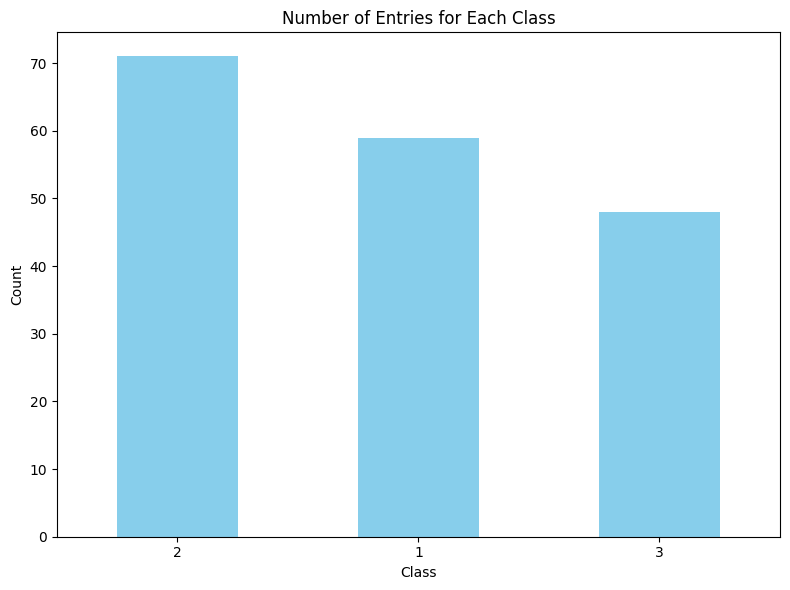

In [16]:
import matplotlib.pyplot as plt

class_counts = df['target_class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
ax = class_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Entries for Each Class')

# Correct the orientation of x-axis labels to be horizontal (0 degrees)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Display the plot
plt.tight_layout()  # Optional: Ensures labels are not cut off
plt.show()



In [19]:
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester

# Define X as all columns except 'target_class'
X = df.drop('target_class', axis=1)

# Define y as the 'target_class' column
y = df['target_class']

y1vsall = y.copy()
y1vsall[y1vsall == 1] = 1
y1vsall[y1vsall != 1] = 0

y2vsall = y.copy()
y2vsall[y1vsall == 2] = 1
y2vsall[y2vsall != 2] = 0

y3vsall = y.copy()
y3vsall[y1vsall == 3] = 1
y3vsall[y3vsall != 3] = 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
_, _, y_train_1vsall, _ = train_test_split(X, y1vsall, test_size=0.2, random_state=1)
_, _, y_train_2vsall, _ = train_test_split(X, y2vsall, test_size=0.2, random_state=1)
_, _, y_train_3vsall, _ = train_test_split(X, y3vsall, test_size=0.2, random_state=1)

# Cluster the input-output space
cl = Clusterer(x_train=X_train, y_train=y_train_1vsall, nr_clus=10)
clust_centers, part_matrix, _ = cl.cluster(method='fcm')

# Estimate membership functions parameters
ae = AntecedentEstimator(X_train, part_matrix)
antecedent_params = ae.determineMF()
# Estimate consequent parameters
ce = ConsequentEstimator(X_train, y_train_1vsall, part_matrix)
conseq_params = ce.suglms()
# Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, features, save_simpful_code=False)
model_0_vs_all = modbuilder.get_model()


KeyError: 4

In [11]:
print(df.columns)
print(attributes)

Index(['target_class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
['target_class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


2. Write a brief report G**_A1_report (where “**” should be replaced by your group
number) in which you explain how you determined the classification model. This report
should include also the main obtained results, which must be discussed. The report can
be obtained directly from your notebook as long as it includes all the referred
information (you can use Markdown for the text of the report). A pdf file generated by
LATEX or word is also acceptable.

3. Write a script (in Matlab is model.m in Python is for example model.py) that reads
your data (as e.g. model.mat) and classify the test set. Your script should save the
vector of classification values y to a file.

4. Your deliverables should be available in the group GitHub and the report
G**_A1_report.pdf) is delivered in Fenix system and has to include the link for
GitHub .